## Recognize Handwritten Digits.
### Using mnist dataset

In [115]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

In [116]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

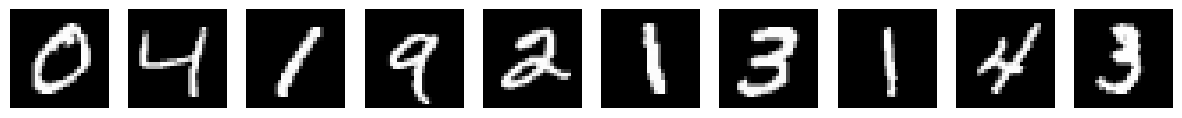

In [117]:
fig = plt.figure(figsize=(15, 5))

for one in range(1, 11):
    fig.add_subplot(1, 10, one)
    plt.imshow(x_train[one])
    plt.axis("off")
    plt.gray()

In [118]:
x_train.shape

(60000, 28, 28)

In [119]:
x_train[0].shape

(28, 28)

In [120]:
# Image Flattening 
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

In [121]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [122]:
# Min - Max Scaling (Normalization)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [123]:
# One Hot-Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [124]:
# Building the Modal
model = Sequential()

model.add(Input(shape=(28 * 28, ) ))

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(28, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy" , optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 28)                  │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,846 (432.99 KB)

 Trainable params: 110,846 (432.99 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
from time import time
tic = time()

model.fit(x_train, y_train, batch_size=100, epochs=10, verbose=1)

toc = time()

print("Model's Training took {} secs".format(toc - tic) )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4397 - loss: 1.8040
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8623 - loss: 0.5061
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8961 - loss: 0.3643
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9105 - loss: 0.3113
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9208 - loss: 0.2767
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9271 - loss: 0.2548
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9323 - loss: 0.2332
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9398 - loss: 0.2125
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9409 - loss: 0.2065
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9444 - loss: 0.1907
Model's Training took 23.465945959091187 secs


In [126]:
# Model Testing
y_pred_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [127]:
from sklearn.metrics import accuracy_score

y_pred = np.where(y_pred_prob > 0.5, 1, 0)

acc_scr = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Accuracy Score: {}%".format(acc_scr))

Accuracy Score: 93.68%


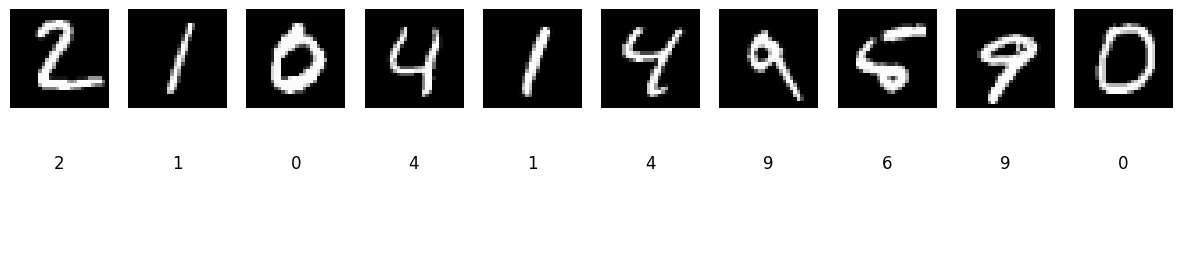

In [128]:
# Let's print
fig = plt.figure(figsize=(15, 5))

for one in range(1, 11): 
    fig.add_subplot(1, 10, one)
    plt.imshow(x_test[one].reshape(28, 28))
    plt.gray()
    plt.axis("off")

    fig.add_subplot(2, 10, one + 10)
    pred_digit = np.argmax(y_pred[one])
    plt.text(0.5, 0.5, str(pred_digit), ha="center", va="center", fontsize=12)
    plt.axis("off")

----

### # Let's predict another chunk of images

In [129]:
chunk = x_test[:20]
y_pred_prob_chunk = model.predict(chunk)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


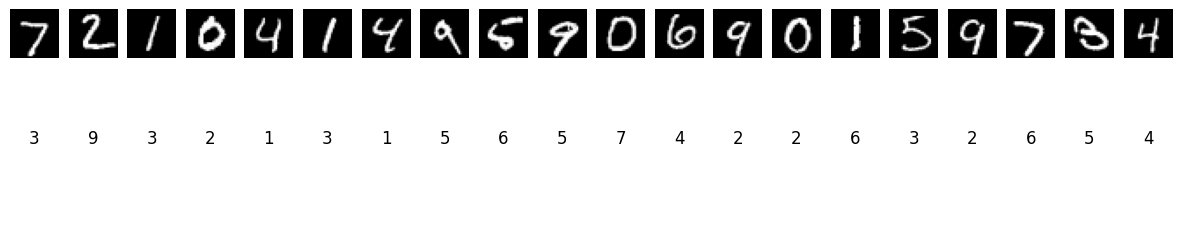

In [144]:
# Let's print
chunk_len = len(chunk)

fig = plt.figure(figsize=(15, 5))

for one in range(chunk_len): 
    fig.add_subplot(1, chunk_len, one+1)
    plt.imshow(chunk[one].reshape(28, 28))
    plt.gray()
    plt.axis("off")

    fig.add_subplot(2, chunk_len, one+1 +chunk_len)
    pred_digit_chunk = np.argmax(y_pred_prob_chunk[one])
    plt.text(0.5, 0.5, str(pred_digit_chunk), ha="center", va="center", fontsize=12)
    plt.axis("off")

----

### Let Predict once again 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


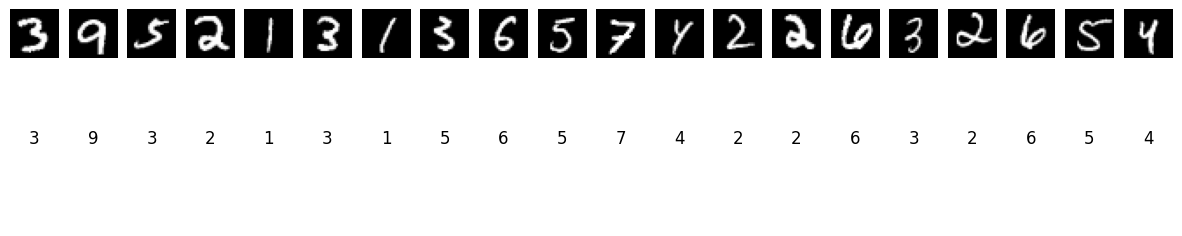

In [143]:
# Let's predict another chunk of images
chunk2 = x_test[500:520]
y_pred_prob_chunk = model.predict(chunk2)

chunk_len = len(chunk2)

fig = plt.figure(figsize=(15, 5))

for one in range(chunk_len): 
    fig.add_subplot(1, chunk_len, one+1)
    plt.imshow(chunk2[one].reshape(28, 28))
    plt.gray()
    plt.axis("off")

    fig.add_subplot(2, chunk_len, one+1 +chunk_len)
    pred_digit_chunk = np.argmax(y_pred_prob_chunk[one])
    plt.text(0.5, 0.5, str(pred_digit_chunk), ha="center", va="center", fontsize=12)
    plt.axis("off")